In [1]:
from wrangle_zillow import *
from model import *




alpha=0.05 #alpha for stats


import plotly.express as px
import warnings



df=prep_zillow_2017(k=1.25)






our sql grab:
 (52442, 15)

Index(['assessmentyear', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'fips', 'fullbathcnt', 'parcelid',
       'latitude', 'logerror', 'longitude', 'lotsizesquarefeet',
       'taxvaluedollarcnt', 'transactiondate', 'yearbuilt'],
      dtype='object')
after ensuring dates sql grab:
 (52441, 17)
df.transactiondate.min():
2017-01-01 00:00:00

df.transactiondate.max():
2017-09-25 00:00:00


/Users/richardmacken/codeup-data-science/clustering-exercises-/wrangle_zillow.py:385: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier'] = False
/Users/richardmacken/codeup-data-science/clustering-exercises-/wrangle_zillow.py:396: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier'] = np.where(((df[col] < lower_bound) | (df[col] > upper_bound)) & (df.outlier == False), True, df.outlier)
/Users/richardmacken/codeup-data-science/clustering-exercises-/wrangle_zillow.py:244: SettingWithCopyWarni

Number of observations removed: 9546
Number of observations removed: 2830
Number of observations removed: 903
This is our percent change after removing all the outliers and merging :
 -25.2%
mean kurt:
0.44477474681080953
final shape:
(39227, 17)


None

,parcelid
county,
LA,61.80%
Orange,28.67%
Ventura,8.86%


In [2]:
df.columns

Index(['bathroomcnt', 'bedroomcnt', 'area', 'taxvaluedollarcnt', 'fips',
       'yearbuilt', 'lotsizesquarefeet', 'longitude', 'transaction_month',
       'logerror', 'latitude', 'county', 'Geogroups', 'agebydecade'],
      dtype='object')

In [3]:
mvp=['area','lotsizesquarefeet','taxvaluedollarcnt','bathroomcnt', 'bedroomcnt','logerror']




fulllist,fullscaledlist,lalist,lascaledlist,oclist,ocscaledlist,venturalist,venturascaledlist=single_split_many_return(df,mvp)
## Non scaled
X_train=fulllist[0]
y_train=fulllist[1]
X_validate=fulllist[2]
y_validate=fulllist[3]
X_test =fulllist[4]
y_test=fulllist[5]
train =fulllist[6]

X_la_train=lalist[0]
y_la_train=lalist[1]
X_la_validate=lalist[2] 
y_la_validate=lalist[3] 
X_la_test=lalist[4] 
y_la_test=lalist[5]
train_la=lalist[6] 

X_orange_train=oclist[0] 
y_orange_train=oclist[1] 
X_orange_validate=oclist[2] 
y_orange_validate=oclist[3] 
X_orange_test=oclist[4] 
y_orange_test=oclist[5] 
orange_train=oclist[6]




X_ventura_train=venturalist[0] 
y_ventura_train=venturalist[1] 
X_ventura_validate=venturalist[2] 
y_ventura_validate=venturalist[3] 
X_ventura_test=venturalist[4] 
y_ventura_test=venturalist[5] 
ventura_train=venturalist[6]


## Scaled



X_scaled_train=fullscaledlist[0]
y_scaled_train=fullscaledlist[1]
X_scaled_validate=fullscaledlist[2]
y_scaled_validate=fullscaledlist[3]
X_scaled_test =fullscaledlist[4]
y_scaled_test=fullscaledlist[5]


X_scaled_la_train=lascaledlist[0]
y_scaled_la_train=lascaledlist[1]
X_scaled_la_validate=lascaledlist[2] 
y_scaled_la_validate=lascaledlist[3] 
X_scaled_la_test=lascaledlist[4] 
y_scaled_la_test=lascaledlist[5]


X_scaled_orange_train=ocscaledlist[0] 
y_scaled_orange_train=ocscaledlist[1] 
X_scaled_orange_validate=ocscaledlist[2] 
y_scaled_orange_validate=ocscaledlist[3] 
X_scaled_orange_test=ocscaledlist[4] 
y_scaled_orange_test=ocscaledlist[5] 


X_scaled_ventura_train=venturascaledlist[0] 
y_scaled_ventura_train=venturascaledlist[1] 
X_scaled_ventura_validate=venturascaledlist[2] 
y_scaled_ventura_validate=venturascaledlist[3] 
X_scaled_ventura_test=venturascaledlist[4] 
y_scaled_ventura_test=venturascaledlist[5] 




/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [4]:
X_scaled_ventura_train


,bathroomcnt,bedroomcnt,area,taxvaluedollarcnt,lotsizesquarefeet,Geogroups,agebydecade
36475,2.0,4.0,2098.0,728160.0,8526.0,17,47
38372,2.5,3.0,1763.0,270359.0,6765.0,23,27
37309,2.0,4.0,1999.0,264587.0,8848.0,21,37
37210,1.5,4.0,1226.0,441000.0,11655.0,21,57
38816,1.0,3.0,964.0,105185.0,6499.0,19,67
...,...,...,...,...,...,...,...
37520,2.0,4.0,2263.0,350663.0,11064.0,21,47
38573,2.5,3.0,2063.0,360329.0,13254.0,19,47
38255,2.0,3.0,1310.0,358970.0,8050.0,20,57
38532,2.5,3.0,1803.0,450222.0,4410.0,22,37


In [5]:
y_scaled_ventura_train


36475   -0.057595
38372   -0.008135
37309    0.003855
37210    0.008370
38816    0.127072
           ...   
37520    0.164748
38573   -0.040018
38255   -0.049093
38532    0.011870
36461   -0.131246
Name: logerror, Length: 1921, dtype: float64

In [6]:
X_scaled_ventura_validate


array([[-0.22222222, -0.44444444, -0.1808012 , ..., -0.12841514,
        -2.69444444, -0.0796875 ],
       [-0.22222222, -0.55555556, -0.18084095, ..., -0.12845642,
        -2.80555556, -0.08125   ],
       [-0.33333333, -0.66666667, -0.18091688, ..., -0.1284525 ,
        -2.80555556, -0.08125   ],
       ...,
       [-0.22222222, -0.44444444, -0.1808625 , ..., -0.12845207,
        -2.83333333, -0.08125   ],
       [-0.22222222, -0.55555556, -0.18088314, ..., -0.12843891,
        -2.83333333, -0.0796875 ],
       [-0.22222222, -0.55555556, -0.18089287, ..., -0.12846105,
        -2.80555556, -0.0796875 ]])

In [7]:
X_scaled_ventura_test


array([[0.5       , 1.        , 0.40952955, ..., 0.5205045 , 0.66666667,
        0.625     ],
       [0.66666667, 0.33333333, 0.07539204, ..., 0.70497123, 1.        ,
        0.875     ],
       [0.66666667, 0.33333333, 0.49155609, ..., 0.39519103, 0.83333333,
        0.25      ],
       ...,
       [0.33333333, 0.33333333, 0.32448733, ..., 0.39887889, 0.5       ,
        0.75      ],
       [0.        , 0.33333333, 0.1884801 , ..., 0.31051778, 0.66666667,
        0.75      ],
       [0.        , 0.33333333, 0.10554885, ..., 0.31405812, 0.5       ,
        0.75      ]])

In [8]:
y_scaled_ventura_test

38927    0.033840
35800   -0.181399
37962   -0.012998
37997    0.001468
36378    0.010575
           ...   
39221    0.023167
37476   -0.117422
38494    0.092108
36240   -0.021274
38901   -0.085906
Name: logerror, Length: 750, dtype: float64



### Exercises

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:



1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County? 
2. Answer those questions through a mix of statistical tests and visualizations. 

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.


In [9]:
# You can meet the requirements of 1 and 2 at once by using a groupby and loop

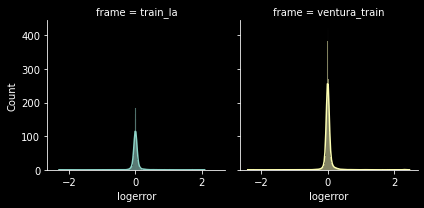

Reject~H_{0}~?

'Yes, we observe that train_la and ventura_train are not from the same population:'

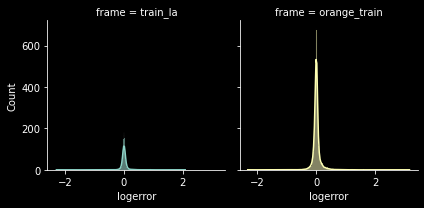

Reject~H_{0}~?

'No, we observe that train_la and orange_train are from the same population:'

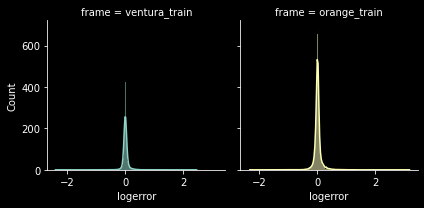

Reject~H_{0}~?

'Yes, we observe that ventura_train and orange_train are not from the same population:'

In [10]:
traincountyset=set(['ventura_train','orange_train','train_la'])
traincounty2combos=list(combinations(traincountyset,2))
traincounty2combos

traincountyset=list(traincountyset)
traincountydf=[ventura_train,orange_train,train_la]

mapper=dict(zip(traincountyset,traincountydf))
target='logerror'

for i in traincounty2combos:
   
 
    a=mapper.get(i[0])
    b=mapper.get(i[1])
    data = pd.concat([a.assign(frame=f'{i[0]}'),
                  b.assign(frame=f'{i[1]}')])
    g=sns.FacetGrid(data, col='frame',hue='frame')

    g.map(sns.histplot,'logerror',kde=True)
    plt.show()
    # g.add_legend(f'We compare:\n{str(i[0])} vs {str(i[1])}')
    varA=a[target]
    varB=b[target]
    t,p =stats.levene(varA,varB)
    if p <= alpha:
        varequal=False
    else:
        varequal=True
    


    
    t,p = stats.ttest_ind(a[target], b[target],equal_var=varequal)
    rejnull=symbols('Reject~H_{0}~?')
    if p <= alpha:
        meanequal=False
        equalpopstring=f'Yes, we observe that {i[0]} and {i[1]} are not from the same population:'
    else:
        meanequal=True
        equalpopstring=f'No, we observe that {i[0]} and {i[1]} are from the same population:'
   

    display(rejnull,equalpopstring)

In [11]:



def interestingdictionary(df,interestingcols,target,n=100):
    '''
    does some cool group by things to isolate a target variable by interestingcols catergorical cols, it then groups by all the uniquie values in that col and if the length is greater than n it saves it as dataframe and attaches it to a dictionary
    the return is dictionary of dictionaries where each unique col is the outer dictionary key and each unique val is the inner dictionary key






    '''
    outerdict={}
    for x,i in enumerate(interestingcols):
        
        uniques=df[i].unique().tolist()


        grp = df.groupby(i)   
    
    
        innerdict={}
        for y,j in enumerate(uniques):
            if  pd.isna(j)==False :
            
                group1=grp.get_group(j)
                isolated=(group1[target])
                if len(isolated)>n:
                    isolated=pd.DataFrame(isolated)   
                    innerdict.update({f'{df[i].name}_{y}':isolated})
                    # print(f'Working with {i}{j}')

                else:
                    # print('Not our condition')
                    continue
            else:

                    continue
        outerdict.update({i:innerdict})
        # print(f'outdict:\n\n{outerdict}')
    return outerdict

   
n=100






def granulartwocombocomparison(df,interestingcols,target,n=100):
    '''
    This is to analyize for consistency. I don't think it is dynamic enought but it is a start. It would make sense to try different binning sizzes as we could find the optimal bins where the populations are mostly different.
    A simular implmentation might be useful just to compare each groupby to the overall population. 


    '''
    interestingAF=interestingdictionary(df,interestingcols,target,n)
    interestingAFkeys=list(interestingAF.keys())
    interestingAFtwoComboDict={}
    for i in range(0,len(interestingAFkeys)):
        interestingAFtwoComboDict.update({interestingAFkeys[i]:list(combinations(list(interestingAF.get(interestingAFkeys[i]).keys()),2))})

    interestingAFtwoComboDict.keys()
    samepopdict={}
    diffpopdict={}





    
    
    
    for i in interestingAFkeys:
        samepop=[]
        diffpop=[]
        combolist=interestingAFtwoComboDict.get(i)
        for j in combolist:
            a=interestingAF.get(i).get(j[0])
           
            b=interestingAF.get(i).get(j[1])
    
        
        
            data = pd.concat([a.assign(frame=f'{j[0]}'),
                          b.assign(frame=f'{j[1]}')])
           
            
            
            # g.add_legend(f'We compare:\n{str(i[0])} vs {str(i[1])}')
            varA=a[target]
            varB=b[target]
            t,p =stats.levene(varA,varB)
            if p <= alpha:
                varequal=False
            else:
                varequal=True
    
    
    
    
            t,p = stats.ttest_ind(a[target], b[target],equal_var=varequal)
            rejnull=symbols('Reject~H_{0}~?')
            if p <= alpha:
                meanequal=False
                equalpopstring=f'Yes, we observe that {j[0]} and {j[1]} are from statistically different populations:'
                diffpop.append(f'{j[0]},{j[1]}')
                display(rejnull,equalpopstring)
                g=sns.FacetGrid(data, col='frame',hue='frame')   
                g.map(sns.histplot,'logerror',kde=True)
                plt.show()
    
            else:
                meanequal=True
                equalpopstring=f'No, we observe that {j[0]} and {j[1]} are from the same population:'
                samepop.append(f'{j[0]},{j[1]}')
                # g=sns.FacetGrid(data, col='frame',hue='frame')   
                # g.map(sns.histplot,'logerror',kde=True)
                # plt.show()
        samepopdict.update({i:samepop})
        diffpopdict.update({i:diffpop})
        

               
                
        
    
            # display(rejnull,equalpopstring)
    lengtha=sum([len(x) for x in [i for i in samepopdict.values()]])
    lengthb=sum([len(x) for x in [i for i in diffpopdict.values()]])
    print(f'different 2-combos count:{lengtha}\nvs\nsame 2-combos count:{lengthb} ')
    
    
    return samepopdict,diffpopdict



We will ask where are the samples significantly differnent for bedroom counts in LA

In [12]:
train_la.columns

Index(['bathroomcnt', 'bedroomcnt', 'area', 'taxvaluedollarcnt', 'fips',
       'yearbuilt', 'lotsizesquarefeet', 'longitude', 'transaction_month',
       'logerror', 'latitude', 'county', 'Geogroups', 'agebydecade'],
      dtype='object')

In [13]:
grp = train_la[['logerror','bedroomcnt']].groupby('bedroomcnt')
grp.mean()   
# group1=grp.get_group('bedroomcnt')
# # group1

,logerror
bedroomcnt,
2.0,0.005812
3.0,0.012319
4.0,0.022333
5.0,0.028224


Reject~H_{0}~?

'Yes, we observe that bedroomcnt_0 and bedroomcnt_2 are from different populations:'

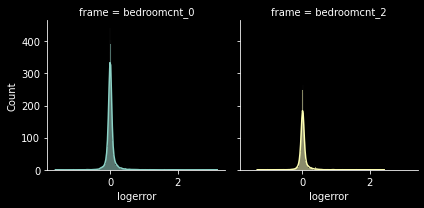

Reject~H_{0}~?

'Yes, we observe that bedroomcnt_0 and bedroomcnt_3 are from different populations:'

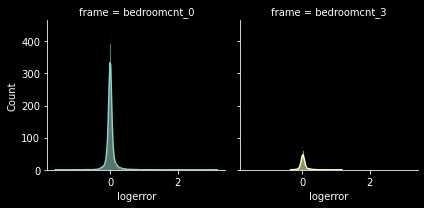

Reject~H_{0}~?

'Yes, we observe that bedroomcnt_1 and bedroomcnt_2 are from different populations:'

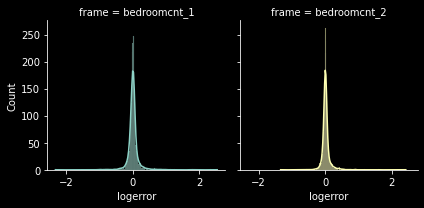

Reject~H_{0}~?

'Yes, we observe that bedroomcnt_1 and bedroomcnt_3 are from different populations:'

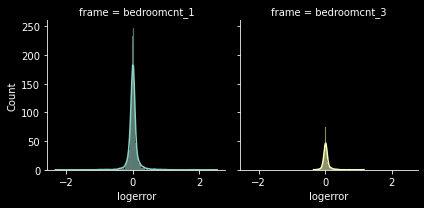

different 2-combos count:2
vs
same 2-combos count:4 


In [14]:
uniquebedrooms_LA= ['bedroomcnt']   
interestingrelationsBedroom_LA=interestingdictionary(train_la,uniquebedrooms_LA,target,100)


interestingrelationsBedroom_LA.keys()
samepop,diffpop=granulartwocombocomparison(train_la,uniquebedrooms_LA,target,n=100)